In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
circ = QuantumCircuit(3, 3)
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)

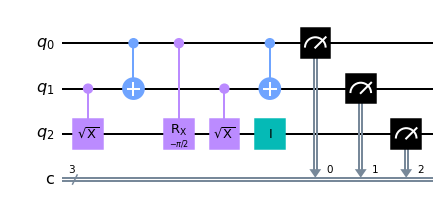

In [6]:
circ.draw('mpl')

In [7]:
circ.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\ncsx q[1],q[2];\ncx q[0],q[1];\ncrx(-pi/2) q[0],q[2];\ncsx q[1],q[2];\ncx q[0],q[1];\nid q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n'

In [8]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
csx q[1],q[2];
cx q[0],q[1];
crx(-pi/2) q[0],q[2];
csx q[1],q[2];
cx q[0],q[1];
id q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [9]:
circ.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
csx q[1],q[2];
cx q[0],q[1];
crx(-pi/2) q[0],q[2];
csx q[1],q[2];
cx q[0],q[1];
id q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [10]:
circ.qasm(formatted=True, filename='qasmex.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
csx q[1],q[2];
cx q[0],q[1];
crx(-pi/2) q[0],q[2];
csx q[1],q[2];
cx q[0],q[1];
id q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [11]:
new_circ = QuantumCircuit.from_qasm_file('qasmex.qasm') #create qasm file for diff. quantum programming language

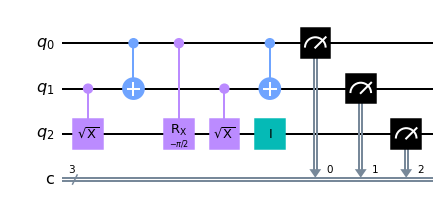

In [12]:
new_circ.draw('mpl')